# Ford GoBike System Data
## by Yasser Alosaimi

## Investigation Overview

In this investigation, I wanted to examine whether the duration of a bike's trip could be predicted by different features of people. The main focus was on user type, gender and duration.

## Dataset Overview

This data set had information about individual rides made in a bike-sharing system

In [10]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [11]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('fordgobike-tripdata.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## What is the highest classification of user type?

As we can see the pie plot shows that the Subscriber ( Member) user type is most popular than Customer (Casual)

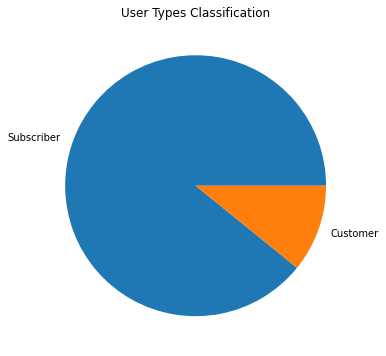

In [12]:
user_types = df['user_type'].value_counts()
plt.figure(figsize=[8,6])
plt.pie(user_types , labels = user_types.index );

plt.title('User Types Classification');
plt.show();

## what is the Relationship between duration and diffrent user type?

we see the Customer type has longest duration

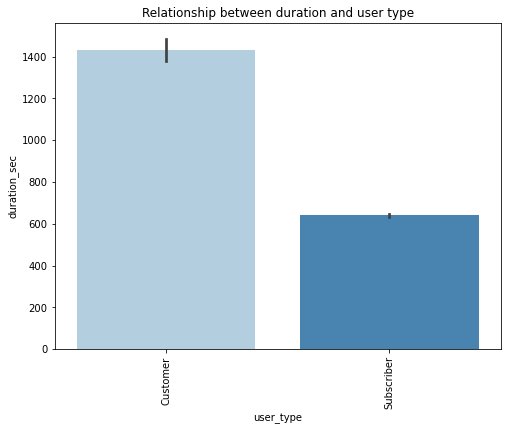

In [13]:
plt.figure(figsize = [8,6])
sb.barplot(data = df, x = 'user_type', y = 'duration_sec', palette = 'Blues')
plt.xticks(rotation=90)

plt.title('Relationship between duration and user type');
plt.show()

## Can you investigate the relation between the daywise usage of bike in Second?


There is a strong relationship between sunday and saturday with the duration that means the bike is used at high level in specific days.





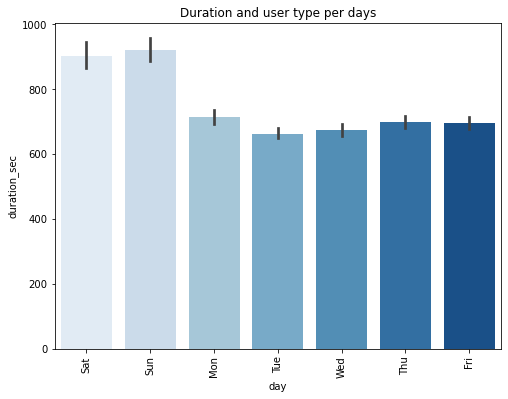

In [14]:
df.user_type = df.user_type.astype('category')

df.start_station_id = df.start_station_id.astype(str)
df.end_station_id = df.end_station_id.astype(str)
df.bike_id = df.bike_id.astype(str)

df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

# add some needed columns to make an accurate relations
df['month'] = df.start_time.dt.strftime('%b')
df['day'] = df.start_time.dt.strftime('%a')
df['hour'] = df.start_time.dt.strftime('%H')

# lebale the days to be in order
week_days = [ 'Sat','Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']

plt.figure(figsize = [8, 6])
sb.barplot(data = df , x = 'day', y = 'duration_sec', order = week_days, palette = 'Blues')
plt.xticks(rotation=90)
plt.title('Duration and user type per days');
plt.show()

## Looking at the gender

We note that the male makes a little more trips than the female

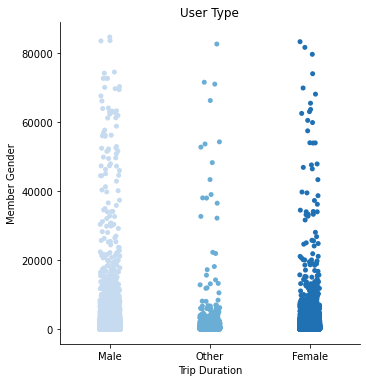

In [15]:
sb.catplot(x="member_gender", y="duration_sec", data=df, palette = 'Blues')
plt.title('User Type');
plt.xlabel('Trip Duration')
plt.ylabel('Member Gender');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt